In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import numpy as np

In [3]:
(X_train,y_train) , (X_test,y_test) = keras.datasets.mnist.load_data()


11493376/11490434 [==============================] - 2s 0us/step


In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
X_train[0].shape

(28, 28)

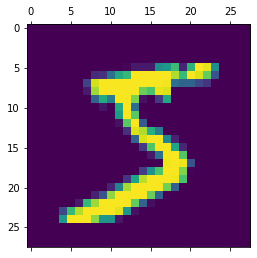

In [10]:
plt.matshow(X_train[0])

In [11]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
len(X_train)

60000

In [27]:
X_train_flattered = X_train.reshape(len(X_train),28*28)

In [28]:
X_train_flattered.shape

(60000, 784)

In [29]:
X_test_flattered = X_test.reshape(len(X_test),28*28)
X_test_flattered.shape


(10000, 784)

In [30]:
X_train_flattered[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [26]:
X_train = X_train/255
X_test = X_test/255

In [31]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(optimizer='adam',
               loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
             )

model.fit(X_train_flattered,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 29s 2ms/step - loss: 0.4707 - accuracy: 0.8773
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3036 - accuracy: 0.9161
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2839 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2735 - accuracy: 0.9247
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9262


In [32]:
model.evaluate(X_test_flattered,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2683 - accuracy: 0.9259


[0.26833242177963257, 0.9258999824523926]

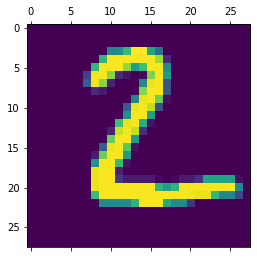

In [40]:
plt.matshow(X_test[1])

In [36]:
y_predicted = model.predict(X_test_flattered)


In [39]:
y_predicted[1]

array([4.3864241e-01, 3.3155680e-03, 9.9935603e-01, 3.5587567e-01,
       5.9096761e-10, 8.4105706e-01, 9.5535451e-01, 6.9442298e-13,
       1.3725707e-01, 2.7321529e-09], dtype=float32)

In [41]:
np.argmax(y_predicted[1])

2

In [42]:
output_predicted = [np.argmax(i)  for i in y_predicted]


In [43]:
output_predicted[:5]

[7, 2, 1, 0, 4]

In [44]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [46]:
confusion_matrix = tf.math.confusion_matrix(labels=y_test,predictions=output_predicted)
confusion_matrix


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    0,    1,    0,    5,   12,    3,    1,    1],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   4,    9,  918,   18,    8,    4,   14,   10,   42,    5],
       [   3,    0,   19,  925,    0,   17,    2,   11,   24,    9],
       [   1,    1,    2,    1,  902,    0,   15,    4,   10,   46],
       [   8,    3,    1,   36,   10,  765,   23,    7,   31,    8],
       [   8,    3,    3,    1,    7,    8,  925,    2,    1,    0],
       [   1,    7,   21,    8,    4,    0,    0,  948,    2,   37],
       [   7,    8,    6,   18,    9,   23,   10,   11,  873,    9],
       [   9,    7,    1,   10,   19,    5,    1,   18,    8,  931]])>

Text(69.0, 0.5, 'Truth')

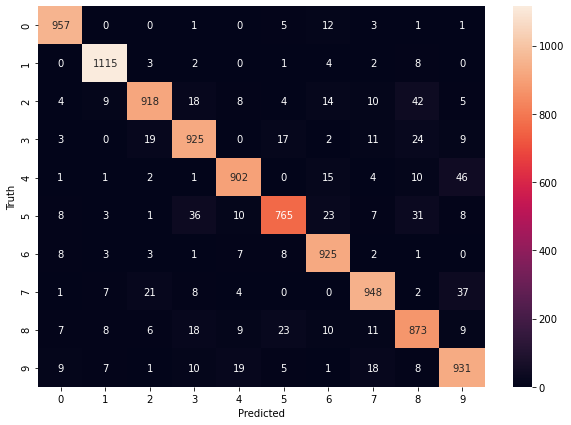

In [48]:
plt.figure(figsize= (10,7))
sns.heatmap(confusion_matrix,annot=True,fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Retraining with adding hidden layer

In [51]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'), #Hidden layer and 100 is number of  hidden layers
    keras.layers.Dense(10,activation='sigmoid')#output layer
])      

model.compile(optimizer='adam',
               loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
             )

model.fit(X_train_flattered,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2675 - accuracy: 0.9231
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1188 - accuracy: 0.9654
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0826 - accuracy: 0.9753
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0631 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0496 - accuracy: 0.9851


In [52]:
model.evaluate(X_test_flattered,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0820 - accuracy: 0.9751


[0.08197857439517975, 0.9750999808311462]

In [53]:
y_predicted = model.predict(X_test_flattered)

In [54]:
output_predicted = [np.argmax(i)  for i in y_predicted]

In [55]:
confusion_matrix = tf.math.confusion_matrix(labels=y_test,predictions=output_predicted)

Text(69.0, 0.5, 'Truth')

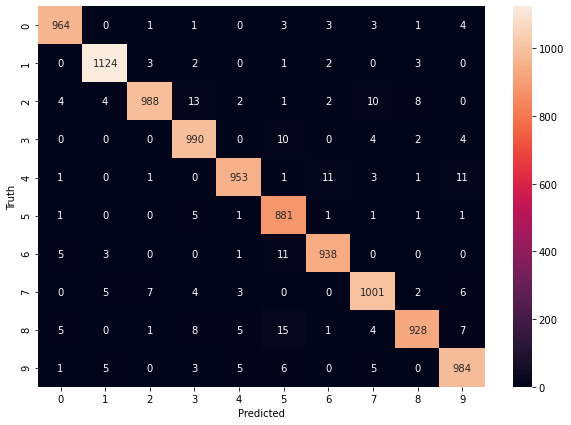

In [56]:
plt.figure(figsize= (10,7))
sns.heatmap(confusion_matrix,annot=True,fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Without flattening training data

In [58]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'), #Hidden layer and 100 is number of  hidden layers
    keras.layers.Dense(10,activation='sigmoid')#output layer
])      

model.compile(optimizer='adam',
               loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
             )

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2702 - accuracy: 0.9231
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1218 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0845 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0643 - accuracy: 0.9812
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0514 - accuracy: 0.9840


In [70]:
import pandas as pd
output = pd.DataFrame([output_predicted,y_test],index = ["Predicted","Actual"])

In [71]:
output

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
Predicted,7,2,1,0,4,1,4,9,5,9,...,7,8,9,0,1,2,3,4,5,6
Actual,7,2,1,0,4,1,4,9,5,9,...,7,8,9,0,1,2,3,4,5,6


In [75]:
index = np.where(output_predicted != y_test)




In [78]:
index = list(index)

In [79]:
output_predicted[index]

TypeError: list indices must be integers or slices, not list